# Early Access

The goal of this program is to determine the likelihood of Early Access Games to leave Early Access.

---

## Data Viewing and Cleaning

In [2]:
# The goal of this program is to determine the likelihood of Early Access Games to
# leave Early Access.

import pandas as pd
import pandas_profiling
from utility_functions import google_drive_useable

data = r'https://drive.google.com/open?id=1pEOgqOZcgxwu7gA4GnFuMwO_wVBLQ7cf'
df   = pd.read_csv(google_drive_useable(data))

In [52]:
# df.to_csv(r'Steam Game Data Cleaned.csv', index = False, header = True)

In [2]:
df.profile_report(style = {'full_width': True})

## Train, Val, Test Split

In [3]:
# Split the data
from sklearn.model_selection import train_test_split

target      = 'ReleaseType'
filtered_df = df[df[target] != 'Traditional Release']

train, test = train_test_split(filtered_df
                              ,train_size   = 0.60
                              ,random_state = 6
                              )

train, val  = train_test_split(train
                              ,train_size   = 0.60
                              ,random_state = 6
                              )

### Baseline

In [4]:
# Baseline Guess is everything stays in Early Access

baseline_guess  = 'Early Access'
baseline_y_pred = [baseline_guess] * len(filtered_df)

filtered_df[target].value_counts(normalize = True)

Early Access       0.686476
Ex Early Access    0.313524
Name: ReleaseType, dtype: float64

In [6]:
target   = 'ReleaseType'
features = ['Metacritic'
           ,'YearsSinceRelease'
           
           ,'SteamSpyOwners'
           ,'RecommendationCount'
           ,'DeveloperCount'
           ,'PublisherCount'
           ,'DLCCount'
           ,'ScreenshotCount'
           
           ,'CategorySinglePlayer'
           ,'CategoryMultiplayer'
           ,'CategoryCoop'
           ,'CategoryMMO'
           ,'CategoryInAppPurchase'
           ,'CategoryIncludeSrcSDK'
           ,'CategoryIncludeLevelEditor'
           ,'CategoryVRSupport'
           
           ,'GenreIsIndie'
           ,'GenreIsAction'
           ,'GenreIsAdventure'
           ,'GenreIsCasual'
           ,'GenreIsStrategy'
           ,'GenreIsRPG'
           ,'GenreIsSimulation'
           ,'GenreIsSports'
           ,'GenreIsRacing'
           ,'GenreIsMassivelyMultiplayer'
           
           ,'PlatformWindows'
           ,'PlatformLinux'
           ,'PlatformMac'
           
           ,'PriceInitial'
           ,'PriceFinal'
           ]

X_train  = train[features]
y_train  = train[target]

X_val    =  val[features]
y_val    =  val[target]

X_test   =  test[features]
y_test   =  test[target]

train.shape, test.shape

((769, 48), (855, 48))

## 3 Models

### Random Forest Classifier

In [7]:
import numpy             as np
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.impute   import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics  import accuracy_score, precision_score, recall_score


rf_pipe = make_pipeline(ce.OrdinalEncoder()
                       ,SimpleImputer()
                       ,RandomForestClassifier(n_estimators = 200
                                              ,n_jobs       = -1
                                              ,random_state = 6)
                                              )
rf_pipe.fit(X_train, y_train)

y_train_pred = rf_pipe.predict(X_train)
y_val_pred   = rf_pipe.predict(X_val)

y_train_prob = rf_pipe.predict_proba(X_train)[:,1]
y_val_prob   = rf_pipe.predict_proba(X_val)[:,1]

In [8]:
from utility_functions import cat_prediction_results


search = cat_prediction_results(y_train
                               ,y_val
                               ,y_train_pred
                               ,y_val_pred
                               ,cat_target = 'Ex Early Access'
                               ,sort_by    = 'predictions'
                               )
search

Baseline Accuracy:	 0.3107932379713914
Baseline Precision:	 0.3107932379713914
Baseline Recall:	 1.0

Training Accuracy:	 1.0
Training Precision:	 1.0
Training Recall:	 1.0

Validation Accuracy:	 0.9571150097465887
Validation Precision:	 0.9691358024691358
Validation Recall:	 0.9022988505747126



### XGBoost Classifier

In [9]:
import numpy             as np
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.impute   import SimpleImputer
from xgboost          import XGBClassifier
from sklearn.metrics  import accuracy_score, precision_score, recall_score


rf_pipe = make_pipeline(ce.OrdinalEncoder()
                       ,SimpleImputer()
                       ,XGBClassifier(n_estimators = 1000
                                     ,n_jobs       = -1
                                     ,random_state = 6
                                     )
                       )
rf_pipe.fit(X_train, y_train)

y_train_pred = rf_pipe.predict(X_train)
y_val_pred   = rf_pipe.predict(X_val)

y_train_prob = rf_pipe.predict_proba(X_train)[:,1]
y_val_prob   = rf_pipe.predict_proba(X_val)[:,1]

In [10]:
from utility_functions import cat_prediction_results


search = cat_prediction_results(y_train
                               ,y_val
                               ,y_train_pred
                               ,y_val_pred
                               ,cat_target = 'Ex Early Access'
                               ,sort_by    = 'predictions'
                               )
search

Baseline Accuracy:	 0.3107932379713914
Baseline Precision:	 0.3107932379713914
Baseline Recall:	 1.0

Training Accuracy:	 1.0
Training Precision:	 1.0
Training Recall:	 1.0

Validation Accuracy:	 0.9532163742690059
Validation Precision:	 0.9213483146067416
Validation Recall:	 0.9425287356321839



### Logistic Regression

In [11]:
import numpy             as np
import category_encoders as ce
from sklearn.pipeline     import make_pipeline
from sklearn.impute       import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics      import accuracy_score, precision_score, recall_score


lr_pipe = make_pipeline(ce.OrdinalEncoder()
                       ,SimpleImputer()
                       ,LogisticRegression(solver = 'liblinear'
                                          )
                       )
lr_pipe.fit(X_train, y_train)

y_train_pred = lr_pipe.predict(X_train)
y_val_pred   = lr_pipe.predict(X_val)

y_train_prob = lr_pipe.predict_proba(X_train)[:,1]
y_val_prob   = lr_pipe.predict_proba(X_val)[:,1]

In [48]:
from utility_functions import cat_prediction_results


search = cat_prediction_results(y_train
                               ,y_val
                               ,y_train_pred
                               ,y_val_pred
                               ,cat_target = 'Ex Early Access'
                               ,sort_by    = 'predictions'
                               )
search

Baseline Accuracy:	 0.3107932379713914
Baseline Precision:	 0.3107932379713914
Baseline Recall:	 1.0

Training Accuracy:	 0.8907672301690507
Training Precision:	 0.8475336322869955
Training Recall:	 0.7907949790794979

Validation Accuracy:	 0.8830409356725146
Validation Precision:	 0.88
Validation Recall:	 0.7586206896551724



## Visualizations

---

### Shap Plot

An explainer which hooks into the model

In [19]:
from plotting_functions import force_explain

force_explain(X_train
             ,y_train
             ,X_val
             ,y_val
             ,row = 600
             )

### PDP Isolate

Shows how one variable can affect the outcome.

In [85]:
X_train.columns

Index(['Metacritic', 'YearsSinceRelease', 'ReleaseDate', 'SteamSpyOwners',
       'RecommendationCount', 'DeveloperCount', 'PublisherCount', 'DLCCount',
       'ScreenshotCount', 'CategorySinglePlayer', 'CategoryMultiplayer',
       'CategoryCoop', 'CategoryMMO', 'CategoryInAppPurchase',
       'CategoryIncludeSrcSDK', 'CategoryIncludeLevelEditor',
       'CategoryVRSupport', 'GenreIsIndie', 'GenreIsAction',
       'GenreIsAdventure', 'GenreIsCasual', 'GenreIsStrategy', 'GenreIsRPG',
       'GenreIsSimulation', 'GenreIsSports', 'GenreIsRacing',
       'GenreIsMassivelyMultiplayer', 'PlatformWindows', 'PlatformLinux',
       'PlatformMac', 'PriceInitial', 'PriceFinal'],
      dtype='object')

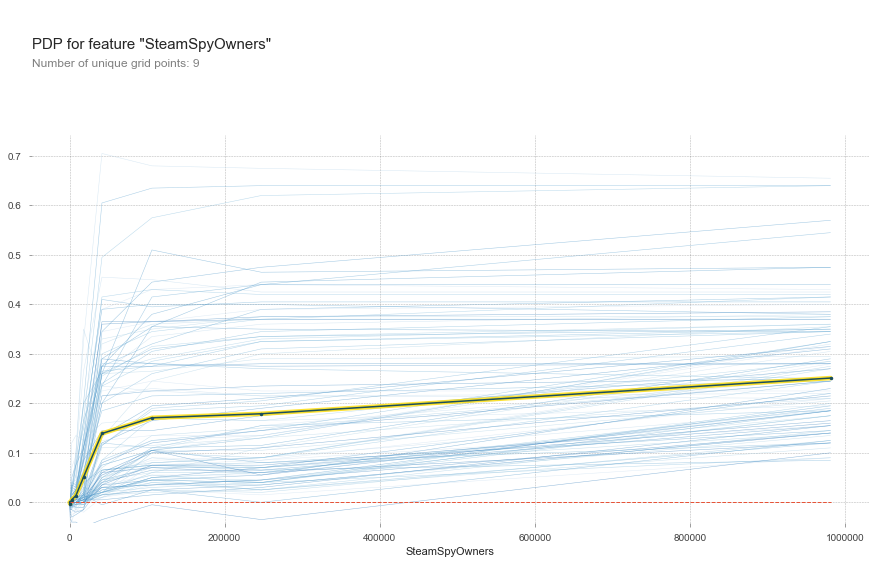

In [34]:
from plotting_functions import pdp_isolate_explain


feature = 'SteamSpyOwners'
pdp_isolate_explain(X_train_mod
                   ,y_train_mod
                   ,feature
                   )

In [33]:
high_concentration_of_players = [27, 23, 22, 8, 10, 18, 26, 3, 4006, 16, 13, 319, 585, 367, 327, 546, 278, 368, 1995, 450, 3322, 185, 611, 295, 623, 358, 6863, 4405, 167, 579, 631, 165, 496, 144, 143, 65, 183, 180, 651, 271, 350, 46, 624, 211, 145, 239, 163, 293, 537, 2314, 159, 569]
high_year_count               = [4890, 441, 9461, 9151, 198, 3, 12476, 22, 68, 151, 405]

X_train_mod = X_train.drop(high_concentration_of_players)
y_train_mod = y_train.drop(high_concentration_of_players)

In [304]:
X_train_mod[X_train_mod['YearsSinceRelease'] == X_train_mod['YearsSinceRelease'].max()]

Metacritic  YearsSinceRelease   ReleaseDate  SteamSpyOwners  \
160            80                 18  Mar 15, 2001          111376   
103            69                 18  Jul 25, 2001           89854   
4016            0                 18   Oct 9, 2001           61696   
539            70                 18   Mar 1, 2001          542532   
201            66                 18  Jun 19, 2001          225442   
420            89                 18  Jun 29, 2001          247861   
635             0                 18  Aug 22, 2001           40892   
11807           0                 18   Jun 8, 2001            2675   
131             0                 18  Nov 20, 2001           24212   

       RecommendationCount  DeveloperCount  PublisherCount  DLCCount  \
160                    104               1               1         0   
103                    321               1               1         0   
4016                     0               1               1         0   
539                   1088               1               1         0   
201                   1401               1               1         0   
420                    558               1               1         0   
635                      0               1               1         0   
11807                    0               1               1         0   
131                      0               1               1         0   

       ScreenshotCount  CategorySinglePlayer  ...  GenreIsRPG  \
160                  9                  True  ...       False   
103                  5                  True  ...       False   
4016                14                  True  ...        True   
539                 48                  True  ...       False   
201                  7                  True  ...       False   
420                  8                  True  ...       False   
635                  7                  True  ...        True   
11807                5                  True  ...       False   
131                 14                  True  ...       False   

       GenreIsSimulation  GenreIsSports  GenreIsRacing  \
160                False          False          False   
103                False          False          False   
4016               False          False          False   
539                False          False          False   
201                False          False          False   
420                False          False          False   
635                False          False          False   
11807               True          False          False   
131                False          False          False   

       GenreIsMassivelyMultiplayer  PlatformWindows  PlatformLinux  \
160                          False             True          False   
103                          False             True          False   
4016                         False             True           True   
539                          False             True          False   
201                          False             True          False   
420                          False             True          False   
635                          False             True           True   
11807                        False             True          False   
131                          False             True          False   

       PlatformMac  PriceInitial  PriceFinal  
160          False          9.99        9.99  
103          False          4.99        4.99  
4016         False         14.99       14.99  
539          False         19.99       19.99  
201          False         19.99       19.99  
420          False          9.99        9.99  
635           True          9.99        9.99  
11807        False         15.99       13.59  
131          False          4.99        4.99  

[9 rows x 32 columns]

In [305]:
X_train_mod['YearsSinceRelease'].max()

18

In [262]:
X_train_mod[X_train_mod['SteamSpyOwners'] == X_train_mod['SteamSpyOwners'].max()]

Metacritic  YearsSinceRelease   ReleaseDate  SteamSpyOwners  \
23          90                 15  Sep 22, 2004        90687580   

    RecommendationCount  DeveloperCount  PublisherCount  DLCCount  \
23               590480               1               1         0   

    ScreenshotCount  CategorySinglePlayer  ...  GenreIsRPG  GenreIsSimulation  \
23               16                 False  ...       False              False   

    GenreIsSports  GenreIsRacing  GenreIsMassivelyMultiplayer  \
23          False          False                        False   

    PlatformWindows  PlatformLinux  PlatformMac  PriceInitial  PriceFinal  
23             True           True         True           0.0         0.0  

[1 rows x 32 columns]

### PDP Interact

In [319]:
X_train.columns

Index(['Metacritic', 'YearsSinceRelease', 'ReleaseDate', 'SteamSpyOwners',
       'RecommendationCount', 'DeveloperCount', 'PublisherCount', 'DLCCount',
       'ScreenshotCount', 'CategorySinglePlayer', 'CategoryMultiplayer',
       'CategoryCoop', 'CategoryMMO', 'CategoryInAppPurchase',
       'CategoryIncludeSrcSDK', 'CategoryIncludeLevelEditor',
       'CategoryVRSupport', 'GenreIsIndie', 'GenreIsAction',
       'GenreIsAdventure', 'GenreIsCasual', 'GenreIsStrategy', 'GenreIsRPG',
       'GenreIsSimulation', 'GenreIsSports', 'GenreIsRacing',
       'GenreIsMassivelyMultiplayer', 'PlatformWindows', 'PlatformLinux',
       'PlatformMac', 'PriceInitial', 'PriceFinal'],
      dtype='object')

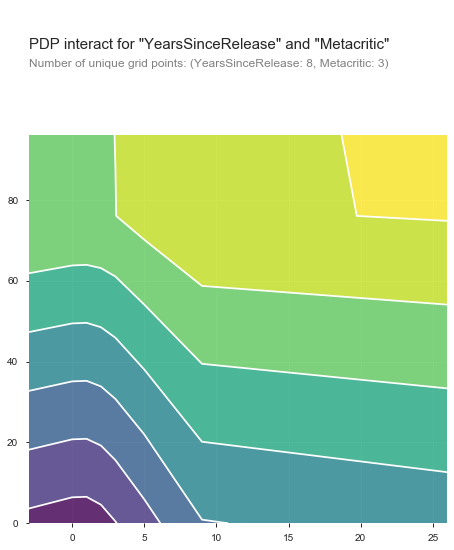

In [37]:
from plotting_functions import pdp_interact_explain


feature = ['YearsSinceRelease', 'Metacritic']
pdp_interact_explain(train[features]
                    ,train[target]
                    ,feature
                    )